In [1]:
# =====================================
# Test to get the whole mess working
# =====================================
import numpy as np
import gym
from Agents.Networks.annik_ac import ActorCritic as Network
#from Agents.EpisodicMemory import EpisodicMemory as Memory
from Agents import Agent
import matplotlib.pyplot as plt

class basic_agent_params():
    def __init__(self, env):
        self.load_model = False
        self.load_dir   = ''
        self.architecture = 'A'
        self.input_dims = env.observation.shape
        self.action_dims = 4
        self.hidden_types = ['conv', 'pool', 'conv', 'pool', 'linear', 'linear']
        self.hidden_dims = [None, None, None, None, 1000, 1000]
        self.freeze_w = False
        self.rfsize = 5
        self.gamma = 0.98
        self.eta = 5e-4

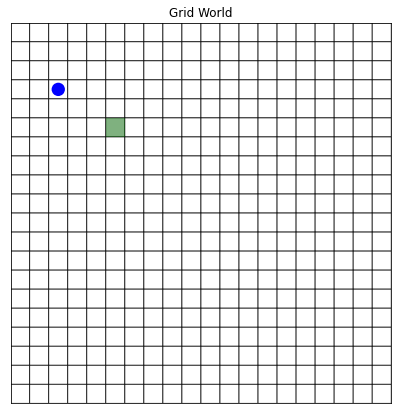

Episode: 0, Score: -1.0000000000000007
Episode: 10, Score: -1.0000000000000007
Episode: 20, Score: -1.0000000000000007
Episode: 30, Score: -1.0000000000000007
Episode: 40, Score: -1.0000000000000007
Episode: 50, Score: -1.0000000000000007
Episode: 60, Score: -1.0000000000000007
Episode: 70, Score: -1.0000000000000007
Episode: 80, Score: 9.049999999999999
Episode: 90, Score: 9.56
Episode: 100, Score: -1.0000000000000007
Episode: 110, Score: -1.0000000000000007
Episode: 120, Score: -1.0000000000000007
Episode: 130, Score: 9.6
Episode: 140, Score: -1.0000000000000007
Episode: 150, Score: -1.0000000000000007
Episode: 160, Score: -1.0000000000000007
Episode: 170, Score: -1.0000000000000007
Episode: 180, Score: -1.0000000000000007
Episode: 190, Score: 9.52
Episode: 200, Score: -1.0000000000000007
Episode: 210, Score: 9.34
Episode: 220, Score: -1.0000000000000007
Episode: 230, Score: -1.0000000000000007
Episode: 240, Score: -1.0000000000000007
Episode: 250, Score: -1.0000000000000007
Episode:

In [4]:
env = gym.make('gym_grid:gridworld-v1')

agent_params = basic_agent_params(env)
agent = Agent(network=Network(agent_params.__dict__) )#, memory=Memory(entry_size=env.action_space.n, cache_limit=env.nstates))

ntrials = 1000
nevents = 100

track_reward = []
track_p_loss = []
track_v_loss = []


for trial in range(ntrials):
    env.reset()
    score = 0
    for event in range(nevents):
        #get observation from environment
        state = env.state ## for record keeping only
        readable = env.oneD2twoD(env.state) ## for record keeping only

        # get observation from environment
        obs = env.get_observation()
        # get action from agent
        action, log_prob, expected_value = agent.get_action(np.expand_dims(obs, axis=0))  ## expand dims to make batch size =1
        # take step in environment
        next_state, reward, done, info = env.step(action)

        # end of event
        target_value = 0
        score += reward


        agent.log_event(episode=trial,event=event,
                        state=state, action=action, reward=reward, next_state=next_state,
                        log_prob=log_prob, expected_value=expected_value, target_value=target_value,
                        done=done, readable_state=readable)

        if done:
            break

    p,v = agent.finish_()

    track_reward.append(score)
    track_p_loss.append(p)
    track_v_loss.append(v)
    if trial%10==0:
        print(f"Episode: {trial}, Score: {score}")

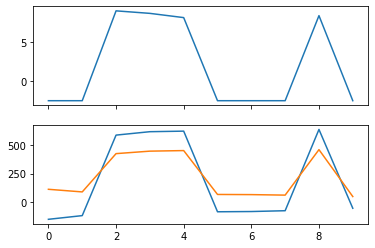

In [3]:
fig, ax = plt.subplots(2,1, sharex=True)
ax[0].plot(track_reward)
ax[1].plot(track_p_loss, label='p')
ax[1].plot(track_v_loss, label='v')
plt.show()